# Import and startup

In [1]:
from UTILITY_quickstart import *

In [2]:
tao = initializeTao(
    inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    defaultsFile = "setLattice_defaults_2024-08-21_demo.yml",
    #csrTF = True,
    numMacroParticles = 1e4,
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
Number of macro particles = 10000.0


# Test beam export/import

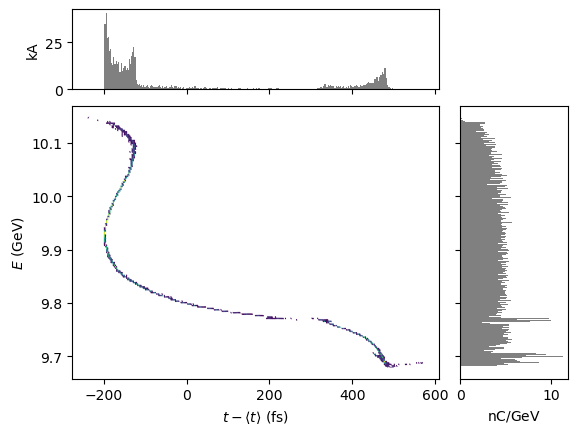

<Figure size 640x480 with 0 Axes>

In [3]:
trackBeam(tao)
P =  getBeamAtElement(tao, "ENDBC20")

display(plotMod(P, 'delta_t', 'energy',  bins=300));
plt.clf()

In [4]:
"""
patchElement = "ENDL1F"
P =  getBeamAtElement(tao, patchElement)
P.write("testBeam.h5")

tao.cmd(f'set beam_init track_start = {patchElement}')
tao.cmd(f'set beam_init position_file=testBeam.h5')
tao.cmd('reinit beam')

trackBeam(tao)
"""

"""
---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
Cell In[4], line 9
      6 tao.cmd(f'set beam_init position_file=testBeam.h5')
      7 tao.cmd('reinit beam')
----> 9 trackBeam(tao)

File ~/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:124, in trackBeam(tao)
    123 def trackBeam(tao):
--> 124     tao.cmd('set global track_type = beam') #set "track_type = single" to return to single particle
    125     tao.cmd('set global track_type = single')

File /opt/homebrew/anaconda3/envs/bmad/lib/python3.11/site-packages/pytao/tao_ctypes/core.py:157, in Tao.cmd(self, cmd, raises)
    155 err = error_in_lines(lines)
    156 if err:
--> 157     raise RuntimeError(f'Command: {cmd} causes error: {err}')
    159 return lines

RuntimeError: Command: set global track_type = beam causes error: ERROR detected: [ERROR | 2024-AUG-23 09:46:16] radiation_map_setup:
    Reference particle lost while tracking through: Q13401#2 (523)
[ERROR | 2024-AUG-23 09:46:16] tao_beam_track:
    RADIATION MAP SETUP WHILE BEAM TRACKING ERROR THROUGH ELEMENT: Q13401#2 (523)
    STOPPING BEAM TRACKING.
"""
;

''

In [5]:
#A naive export/import can fail if there's RF downstream since the phases will be wrong
#However, it appears to be fine if there's no RF downstream

In [6]:
patchElement = "BEGBC20"
P =  getBeamAtElement(tao, patchElement)
P.write("testBeam.h5")

tao.cmd(f'set beam_init track_start = {patchElement}')
tao.cmd(f'set beam_init position_file=testBeam.h5')
tao.cmd('reinit beam')

trackBeam(tao)

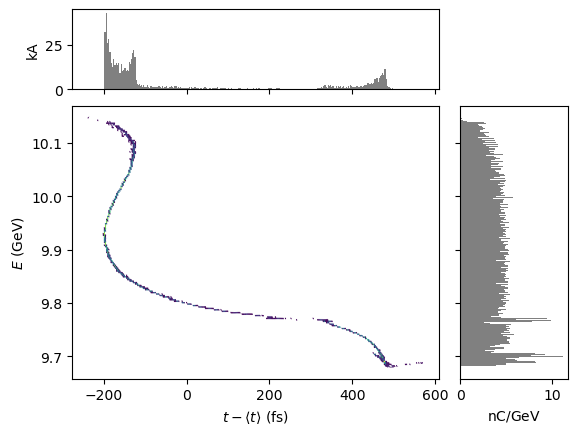

In [7]:
P =  getBeamAtElement(tao, "ENDBC20")

display(plotMod(P, 'delta_t', 'energy',  bins=300));
plt.clf()

In [8]:
import UTILITY_OpenPMDtoBmad

In [9]:
patchElement = "ENDL1F"
P =  getBeamAtElement(tao, patchElement)
P.write("testBeam.h5")

In [10]:
UTILITY_OpenPMDtoBmad.OpenPMD_to_Bmad("testBeam.h5")

In [11]:
tao.cmd(f'set beam_init track_start = {patchElement}')
tao.cmd(f'set beam_init position_file=testBeam.h5')
tao.cmd('reinit beam')

trackBeam(tao)

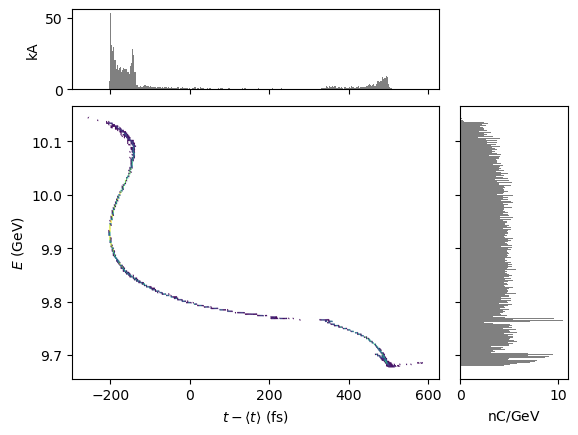

In [12]:
P =  getBeamAtElement(tao, "ENDBC20")

display(plotMod(P, 'delta_t', 'energy',  bins=300));
plt.clf()